In [12]:
#BiocManager::install("MMUPHin")
#BiocManager::install("UniprotR")
library(MMUPHin)
library(Maaslin2)
library(UniprotR)
library(magrittr)
library(dplyr)
library(limma)
library(edgeR)
library(knitr)
library(ggplot2)
library(vegan)
library(pheatmap)
library(tidyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




In [92]:
pathabundance <- read.delim("merged_cpm_pathabundance_crc.tsv")

In [93]:
#Tots els valors han de ser enters                                          
pathabundance[1:nrow(pathabundance),2:length(pathabundance)] <- as.data.frame(lapply(pathabundance[1:nrow(pathabundance),
                                                                       2:length(pathabundance)], as.integer))
#Modifiquem nom columnes
tmp <- strsplit(readLines("merged_cpm_pathabundance_crc.tsv", n=1), "\t")[[1]]
nms <- tmp[2:length(tmp)]
names(pathabundance)[2:length(pathabundance)] <- gsub("_Abundance", "", nms)
                                          
#Modifiquem nom files
row.names(pathabundance) <- pathabundance[1:nrow(pathabundance),1]
pathabundance <- pathabundance[,2:length(pathabundance)]

#Eliminem fila UNMAPPED i UNINTEGRATED
pathabundance <- pathabundance[!grepl("UNMAPPED", row.names(pathabundance)),]
pathabundance <- pathabundance[!grepl("UNINTEGRATED", row.names(pathabundance)),]

#Eliminem files amb 0 per totes les mostres
pathabundance <- pathabundance[rowSums(pathabundance > 0)>0,1:length(pathabundance)]

In [94]:
metadata <- read.csv("metadades_full.csv")
# afegim variable study (Batch)
metadata$study <- substr(metadata$sample,1,6)
# convertim condition a factor
metadata$condition <- factor(metadata$condition, levels=c("Control", "CRC"))
metadata$region <- factor(metadata$region, levels=c("Xina", "EUA"))
metadata$seq_tool[which(metadata$seq_tool=="NaN")] <- "Altre"
metadata$seq_tool <- factor(metadata$seq_tool, levels=c("NovaSeq", "HiSeq", "Altre"))
# reordenem per alinear mostres amb les columnes del arxiu de counts
metadata$sample2 <- metadata$sample
metadata <- left_join(data.frame(sample2 = colnames(pathabundance)), metadata)
#canviem nom de files
rownames(metadata) <- metadata$sample
#eliminem columnes no necessàries
metadata <- metadata[1:nrow(metadata),3:length(metadata)]

Joining, by = "sample2"


In [15]:
pathabundance

,SRR14160074,SRR14160080,SRR14160087,SRR14160092,SRR14160097,SRR14160103,SRR14160107,SRR14160113,SRR14160119,SRR14160121,⋯,SRR8506108,SRR8506109,SRR8506110,SRR8506111,SRR8506112,SRR8506113,SRR8506114,SRR8506115,SRR8506116,SRR8506117
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"12DICHLORETHDEG-PWY: 1,2-dichloroethane degradation",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1CMET2-PWY: folate transformations III (E. coli),136,173,170,134,150,280,76,161,196,137,⋯,148,64,175,45,156,100,153,126,137,146
1CMET2-PWY: folate transformations III (E. coli)|g__Aeromonas.s__Aeromonas_veronii,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1CMET2-PWY: folate transformations III (E. coli)|g__Aggregatibacter.s__Aggregatibacter_segnis,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1CMET2-PWY: folate transformations III (E. coli)|g__Akkermansia.s__Akkermansia_muciniphila,0,0,0,0,0,0,3,33,0,0,⋯,0,0,0,0,11,0,0,2,0,0
1CMET2-PWY: folate transformations III (E. coli)|g__Alistipes.s__Alistipes_finegoldii,49,0,11,0,0,0,0,40,0,0,⋯,3,0,0,0,1,0,15,0,2,0
1CMET2-PWY: folate transformations III (E. coli)|g__Alistipes.s__Alistipes_onderdonkii,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1CMET2-PWY: folate transformations III (E. coli)|g__Alistipes.s__Alistipes_putredinis,13,0,9,0,0,0,3,0,24,0,⋯,12,17,0,0,45,15,0,15,12,6
1CMET2-PWY: folate transformations III (E. coli)|g__Anaerostipes.s__Anaerostipes_hadrus,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [99]:
#Transformem counts a taula no estratificada
unstrat_table <- function(counts) {
    temp = counts[!grepl("\\|", rownames(counts)),]
    return(temp)
}
pathabundance_unstrat <- unstrat_table(pathabundance)

In [100]:
fit_adjust_batch <- MMUPHin::adjust_batch(feature_abd=pathabundance_unstrat, batch="study",
                                covariates = c("condition"),
                                data = metadata,
                                control = list(verbose=TRUE))
pathabundance_unstrat_adj <- fit_adjust_batch$feature_abd_adj
write.table(pathabundance_unstrat_adj, file = "pathabundance_adj.tsv", sep="\t", row.names=FALSE)

feature_abd is counts

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Found 6 batches

Adjusting for 1 covariate(s) or covariate(s) level(s)

Pseudo count is not specified and set to half of minimal non-zero value: 5e-01

Adjusting for (after filtering) 466 features

Standardizing data across features

Estimating batch difference parameters and EB priors

Performing shrinkage adjustments on batch difference parameters

Performing batch corrections



In [19]:
maaslin <- Maaslin2(input_data = pathabundance_unstrat_adj,
                    input_metadata = metadata,
                    output = "maaslin2_pathabundance",
                    fixed_effects = c("condition"),
                    random_effects = c("study"),
                    normalization = "NONE",
                    min_abundance = 0.0001,
                    min_prevalence = 0.1,
                    plot_scatter = FALSE,
                     cores = 7)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-05-16 05:47:06 INFO::Writing function arguments to log file
2022-05-16 05:47:06 INFO::Verifying options selected are valid
2022-05-16 05:47:06 INFO::Determining format of input files
2022-05-16 05:47:06 INFO::Input format is data samples as columns and metadata samples as rows
2022-05-16 05:47:06 INFO::Formula for random effects: expr ~ (1 | study)
2022-05-16 05:47:06 INFO::Formula for fixed effects: expr ~  condition
2022-05-16 05:47:06 INFO::Filter data based on min abundance and min prevalence
2022-05-16 05:47:06 INFO::Total samples in data: 300
2022-05-16 05:47:06 INFO::Min samples required with min abundance for a feature not to be filtered: 30.000000
2022-05-16 05:47:06 INFO::Total filtered features: 85
2022-05-16 05:47:06 INFO::Filtered feature names from abundance and prevalence filtering: X12DICHLORETHDEG.PWY..1.2.dichloroethane.degradation, CHLOROPHYLL.SYN..3.8.divinyl.chlorophyllide.a.biosynthesis.I..aero

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


[1] "There is not enough metadata in the associations to create a heatmap plot. Please review the associations in text output file."


In [101]:
set.seed(42)
CRC_samples <- sample(row.names(metadata)[metadata$condition=="CRC"],28)
C_samples <- sample(row.names(metadata)[metadata$condition=="Control"],28)

In [102]:
toptable <- read.delim("maaslin2_pathabundance/significant_results.tsv")

In [103]:
#0.01
nrow(toptable[toptable$qval < 0.01,])
#0.001
nrow(toptable[toptable$qval < 0.001,])
#0.0005
nrow(toptable[toptable$qval < 0.0005,])
#0.0001
nrow(toptable[toptable$qval < 0.0001,])

[1] 160

[1] 34

[1] 20

[1] 10

In [87]:
write.table(toptable, file = "toppathways_CRC.tsv", sep="\t", row.names=FALSE)

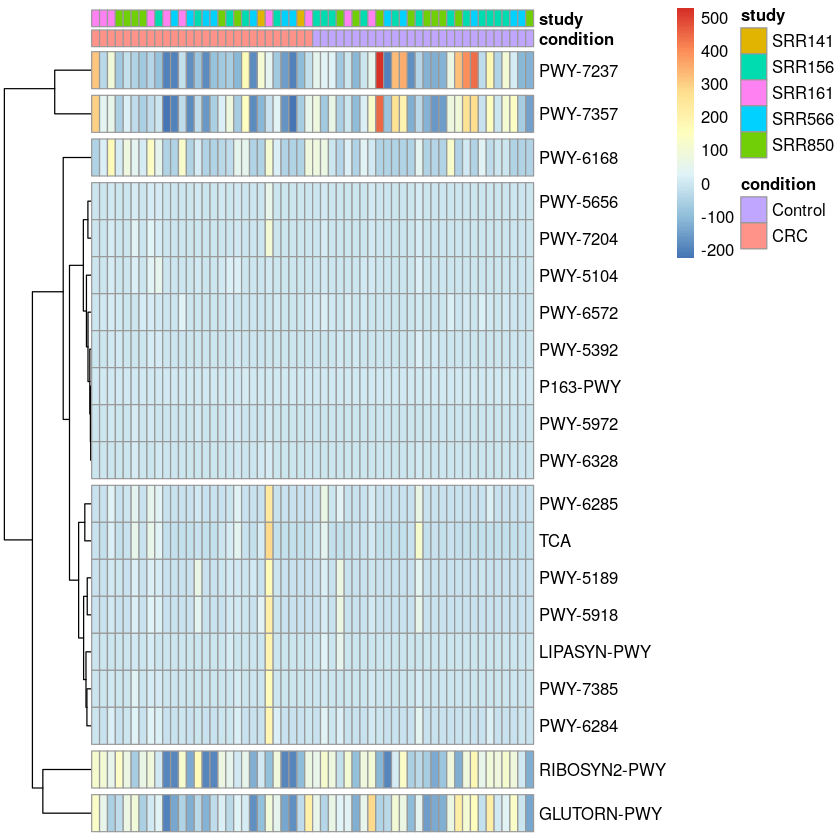

In [104]:
topgenes <- toptable[(toptable$qval < 0.0005),]
topgenes$feature <- gsub('\\.', '-', topgenes$feature)
topgenes$feature <- lapply(topgenes$feature, function(x) unlist(strsplit(x, "--"))[1])
topgenes$feature <- unlist(topgenes$feature)
pathabundance_unstrat_adj_fixed <- pathabundance_unstrat_adj 
row.names(pathabundance_unstrat_adj_fixed) <- lapply(row.names(pathabundance_unstrat_adj), 
                                                     function(x) unlist(strsplit(x, ":"))[1])

mat  <- pathabundance_unstrat_adj_fixed[topgenes$feature, c(CRC_samples, C_samples)]  
mat <- mat - rowMeans(mat)
pheatmap(mat, cluster_rows=TRUE, cluster_cols=FALSE, annotation_col = metadata[,c(3,4)], 
         show_colnames = FALSE, cutree_rows=7)

## DM2

In [105]:
pathabundance <- read.delim("merged_cpm_pathabundance_dm2.tsv")

In [106]:
#Tots els valors han de ser enters                                          
pathabundance[1:nrow(pathabundance),2:length(pathabundance)] <- as.data.frame(lapply(pathabundance[1:nrow(pathabundance),
                                                                       2:length(pathabundance)], as.integer))
#Modifiquem nom columnes
tmp <- strsplit(readLines("merged_cpm_pathabundance_dm2.tsv", n=1), "\t")[[1]]
nms <- tmp[2:length(tmp)]
names(pathabundance)[2:length(pathabundance)] <- gsub("_Abundance", "", nms)
                                          
#Modifiquem nom files
row.names(pathabundance) <- pathabundance[1:nrow(pathabundance),1]
pathabundance <- pathabundance[,2:length(pathabundance)]

#Eliminem fila UNMAPPED i UNINTEGRATED
pathabundance <- pathabundance[!grepl("UNMAPPED", row.names(pathabundance)),]
pathabundance <- pathabundance[!grepl("UNINTEGRATED", row.names(pathabundance)),]

#Eliminem files amb 0 per totes les mostres
pathabundance <- pathabundance[rowSums(pathabundance > 0)>0,1:length(pathabundance)]

In [107]:
metadata <- read.csv("metadades_DM2.csv")
# reordenem per alinear mostres amb les columnes del arxiu de counts
metadata$sample2 <- metadata$sample
metadata <- left_join(data.frame(sample2 = colnames(pathabundance)), metadata)
#canviem nom de files
rownames(metadata) <- metadata$sample
#eliminem columnes no necessàries
metadata <- metadata[1:nrow(metadata),3:length(metadata)]

Joining, by = "sample2"


In [108]:
pathabundance_unstrat <- unstrat_table(pathabundance)

In [109]:
fit_adjust_batch <- MMUPHin::adjust_batch(feature_abd=pathabundance_unstrat, batch="study",
                                covariates = c("condition"),
                                data = metadata,
                                control = list(verbose=TRUE))
pathabundance_unstrat_adj <- fit_adjust_batch$feature_abd_adj
write.table(pathabundance_unstrat_adj, file = "pathabundance_adj_dm2.tsv", sep="\t", row.names=FALSE)

feature_abd is counts

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Found 3 batches

Adjusting for 1 covariate(s) or covariate(s) level(s)

Pseudo count is not specified and set to half of minimal non-zero value: 5e-01

Adjusting for (after filtering) 444 features

Standardizing data across features

Estimating batch difference parameters and EB priors

Performing shrinkage adjustments on batch difference parameters

Performing batch corrections



In [110]:
maaslin <- Maaslin2(input_data = pathabundance_unstrat_adj,
                    input_metadata = metadata,
                    output = "maaslin2_pathabundance_dm2",
                    fixed_effects = c("condition"),
                    random_effects = c("study"),
                    normalization = "NONE",
                    min_abundance = 0.0001,
                    min_prevalence = 0.1,
                    plot_scatter = FALSE,
                     cores = 7)

[1] "Warning: Deleting existing log file: maaslin2_pathabundance_dm2/maaslin2.log"
2022-05-16 06:25:02 INFO::Writing function arguments to log file
2022-05-16 06:25:02 INFO::Verifying options selected are valid
2022-05-16 06:25:02 INFO::Determining format of input files
2022-05-16 06:25:02 INFO::Input format is data samples as columns and metadata samples as rows
2022-05-16 06:25:02 INFO::Formula for random effects: expr ~ (1 | study)
2022-05-16 06:25:02 INFO::Formula for fixed effects: expr ~  condition
2022-05-16 06:25:02 INFO::Filter data based on min abundance and min prevalence
2022-05-16 06:25:02 INFO::Total samples in data: 192
2022-05-16 06:25:02 INFO::Min samples required with min abundance for a feature not to be filtered: 19.200000
2022-05-16 06:25:02 INFO::Total filtered features: 75
2022-05-16 06:25:02 INFO::Filtered feature names from abundance and prevalence filtering: CHLOROPHYLL.SYN..3.8.divinyl.chlorophyllide.a.biosynthesis.I..aerobic..light.dependent., CRNFORCAT.PWY.

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


[1] "There is not enough metadata in the associations to create a heatmap plot. Please review the associations in text output file."


In [111]:
set.seed(42)
DM2_samples <- sample(row.names(metadata)[metadata$condition=="DM2"],28)
C_samples <- sample(row.names(metadata)[metadata$condition=="Control"],28)

In [112]:
toptable <- read.delim("maaslin2_pathabundance_dm2/significant_results.tsv")

In [113]:
#0.01
nrow(toptable[toptable$qval < 0.01,])
#0.001
nrow(toptable[toptable$qval < 0.001,])
#0.0001
nrow(toptable[toptable$qval < 0.0001,])
#0.00001
nrow(toptable[toptable$qval < 0.00001,])
#0.000001
nrow(toptable[toptable$qval < 0.000001,])

[1] 227

[1] 191

[1] 126

[1] 77

[1] 26

In [114]:
write.table(toptable, file = "toppathways_DM2.tsv", sep="\t", row.names=FALSE)

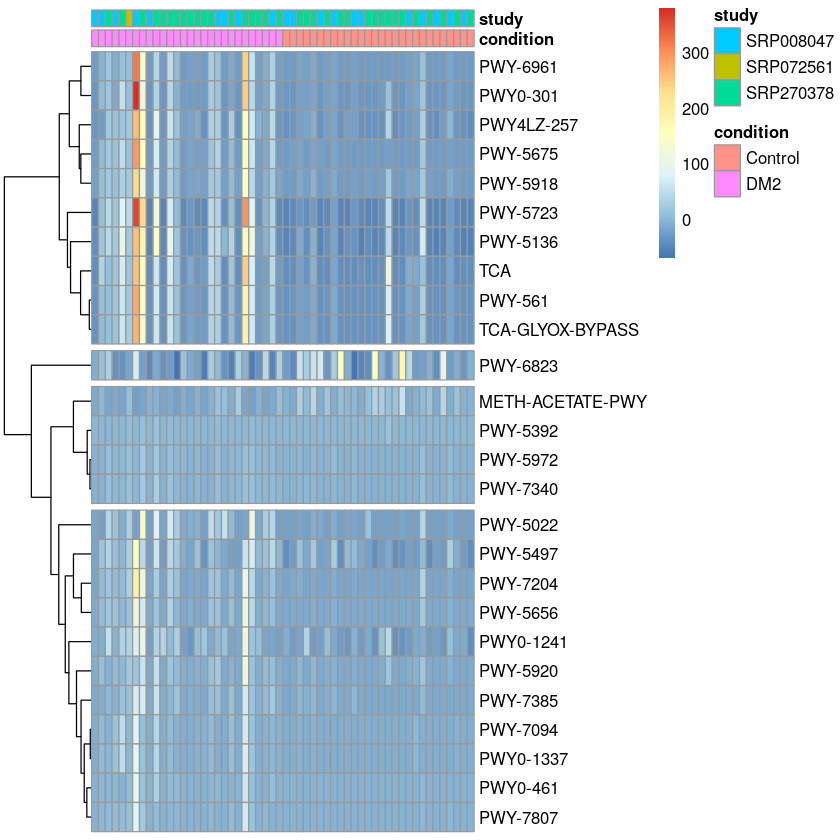

In [116]:
topgenes <- toptable[(toptable$qval < 0.000001),]
topgenes$feature <- gsub('\\.', '-', topgenes$feature)
topgenes$feature <- lapply(topgenes$feature, function(x) unlist(strsplit(x, "--"))[1])
topgenes$feature <- unlist(topgenes$feature)
pathabundance_unstrat_adj_fixed <- pathabundance_unstrat_adj 
row.names(pathabundance_unstrat_adj_fixed) <- lapply(row.names(pathabundance_unstrat_adj), 
                                                     function(x) unlist(strsplit(x, ":"))[1])

mat  <- pathabundance_unstrat_adj_fixed[topgenes$feature, c(DM2_samples, C_samples)]  
mat <- mat - rowMeans(mat)
pheatmap(mat, cluster_rows=TRUE, cluster_cols=FALSE, annotation_col = metadata, 
         show_colnames = FALSE, cutree_rows=4)

## PD

In [117]:
pathabundance <- read.delim("merged_cpm_pathabundance_pd.tsv")

In [118]:
#Tots els valors han de ser enters                                          
pathabundance[1:nrow(pathabundance),2:length(pathabundance)] <- as.data.frame(lapply(pathabundance[1:nrow(pathabundance),
                                                                       2:length(pathabundance)], as.integer))
#Modifiquem nom columnes
tmp <- strsplit(readLines("merged_cpm_pathabundance_pd.tsv", n=1), "\t")[[1]]
nms <- tmp[2:length(tmp)]
names(pathabundance)[2:length(pathabundance)] <- gsub("_Abundance", "", nms)
                                          
#Modifiquem nom files
row.names(pathabundance) <- pathabundance[1:nrow(pathabundance),1]
pathabundance <- pathabundance[,2:length(pathabundance)]

#Eliminem fila UNMAPPED i UNINTEGRATED
pathabundance <- pathabundance[!grepl("UNMAPPED", row.names(pathabundance)),]
pathabundance <- pathabundance[!grepl("UNINTEGRATED", row.names(pathabundance)),]

#Eliminem files amb 0 per totes les mostres
pathabundance <- pathabundance[rowSums(pathabundance > 0)>0,1:length(pathabundance)]

In [119]:
metadata <- read.csv("metadades_PD.csv", fileEncoding="iso-8859-1")
# reordenem per alinear mostres amb les columnes del arxiu de counts
metadata$sample2 <- metadata$sample
metadata <- left_join(data.frame(sample2 = colnames(pathabundance)), metadata)
#canviem nom de files
rownames(metadata) <- metadata$sample
#eliminem columnes no necessàries
metadata <- metadata[1:nrow(metadata),3:length(metadata)]

Joining, by = "sample2"


In [120]:
#Transformem counts a taula no estratificada
unstrat_table <- function(counts) {
    temp = counts[!grepl("\\|", rownames(counts)),]
    return(temp)
}
pathabundance_unstrat <- unstrat_table(pathabundance)

In [121]:
fit_adjust_batch <- MMUPHin::adjust_batch(feature_abd=pathabundance_unstrat, batch="study",
                                covariates = c("condition"),
                                data = metadata,
                                control = list(verbose=TRUE))
pathabundance_unstrat_adj <- fit_adjust_batch$feature_abd_adj
write.table(pathabundance_unstrat_adj, file = "pathabundance_adj_pd.tsv", sep="\t", row.names=FALSE)

feature_abd is counts

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Found 2 batches

Adjusting for 1 covariate(s) or covariate(s) level(s)

Pseudo count is not specified and set to half of minimal non-zero value: 5e-01

Adjusting for (after filtering) 444 features

Standardizing data across features

Estimating batch difference parameters and EB priors

Performing shrinkage adjustments on batch difference parameters

Performing batch corrections



In [122]:
maaslin <- Maaslin2(input_data = pathabundance_unstrat_adj,
                    input_metadata = metadata,
                    output = "maaslin2_pathabundance_pd",
                    fixed_effects = c("condition"),
                    random_effects = c("study"),
                    normalization = "NONE",
                    min_abundance = 0.0001,
                    min_prevalence = 0.1,
                    plot_scatter = FALSE,
                     cores = 7)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-05-16 06:29:04 INFO::Writing function arguments to log file
2022-05-16 06:29:04 INFO::Verifying options selected are valid
2022-05-16 06:29:04 INFO::Determining format of input files
2022-05-16 06:29:04 INFO::Input format is data samples as columns and metadata samples as rows
2022-05-16 06:29:04 INFO::Formula for random effects: expr ~ (1 | study)
2022-05-16 06:29:04 INFO::Formula for fixed effects: expr ~  condition
2022-05-16 06:29:04 INFO::Filter data based on min abundance and min prevalence
2022-05-16 06:29:04 INFO::Total samples in data: 136
2022-05-16 06:29:04 INFO::Min samples required with min abundance for a feature not to be filtered: 13.600000
2022-05-16 06:29:04 INFO::Total filtered features: 76
2022-05-16 06:29:04 INFO::Filtered feature names from abundance and prevalence filtering: X12DICHLORETHDEG.PWY..1.2.dichloroethane.degradation, CHLOROPHYLL.SYN..3.8.divinyl.chlorophyllide.a.biosynthesis.I..aero

In [123]:
set.seed(42)
PD_samples <- sample(row.names(metadata)[metadata$condition=="PD"],28)
C_samples <- sample(row.names(metadata)[metadata$condition=="Control"],28)

In [124]:
toptable <- read.delim("maaslin2_pathabundance_pd/significant_results.tsv")

In [128]:
#0.01
nrow(toptable[toptable$qval < 0.01,])
nrow(toptable)

[1] 0

[1] 23

In [129]:
write.table(toptable, file = "toppathways_PD.tsv", sep="\t", row.names=FALSE)

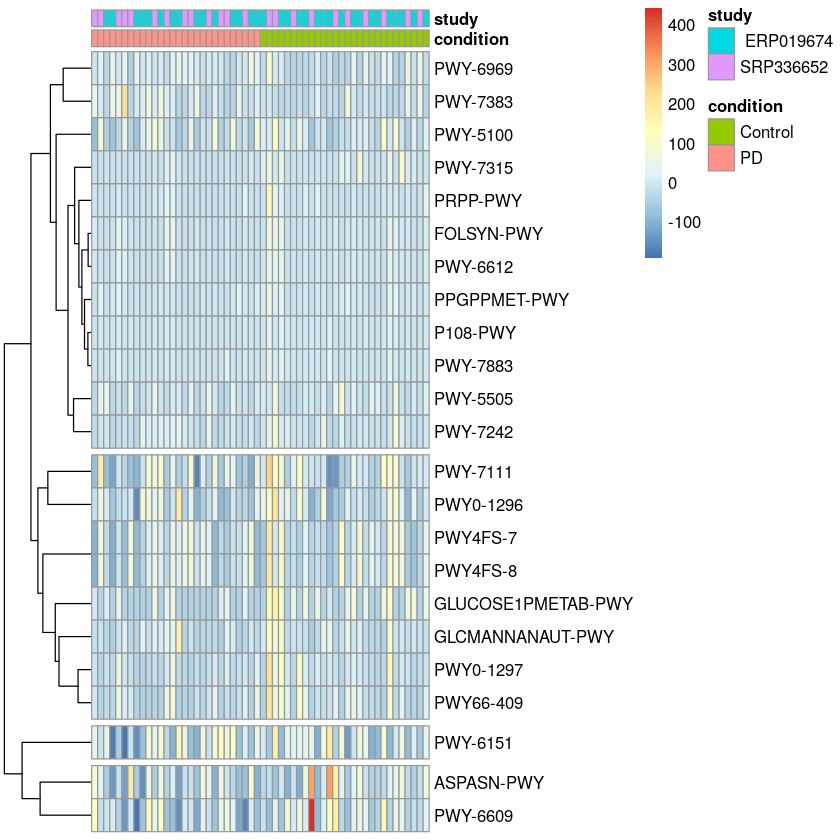

In [130]:
topgenes <- toptable
topgenes$feature <- gsub('\\.', '-', topgenes$feature)
topgenes$feature <- lapply(topgenes$feature, function(x) unlist(strsplit(x, "--"))[1])
topgenes$feature <- unlist(topgenes$feature)
pathabundance_unstrat_adj_fixed <- pathabundance_unstrat_adj 
row.names(pathabundance_unstrat_adj_fixed) <- lapply(row.names(pathabundance_unstrat_adj), 
                                                     function(x) unlist(strsplit(x, ":"))[1])

mat  <- pathabundance_unstrat_adj_fixed[topgenes$feature, c(PD_samples, C_samples)]  
mat <- mat - rowMeans(mat)
pheatmap(mat, cluster_rows=TRUE, cluster_cols=FALSE, annotation_col = metadata, 
         show_colnames = FALSE, cutree_rows=4)